## Japan equities since 2023

Sources:
- [Is the recent enthusiasm about Japanese equities justified? - J.P. Morgan AM](https://am.jpmorgan.com/us/en/asset-management/adv/insights/market-insights/market-updates/on-the-minds-of-investors/is-the-recent-enthusiasm-about-japanese-equities-justified/)
- [Japan's Stock Market is forecast to have a transformational year in 2024 - Goldman Sachs](https://www.goldmansachs.com/intelligence/pages/japans-stock-market-is-forecast-to-have-a-transformational-year-in-2024.html)
- [Can the Nikkei's record rally in Japanese stocks continue? - Goldman Sachs](https://www.goldmansachs.com/intelligence/pages/can-the-nikkei-record-rally-japan-stocks-continue.html)
- [Bank of Japan may exit the world's last negative rates next week. Here's what you need to know. - CNBC](https://www.cnbc.com/2024/03/13/bank-of-japan-boj-may-exit-negative-rates-next-week.html)
- [Japan stock exchange adopts name and shame regime to boost corporate valuations - Financial Times](https://www.ft.com/content/94dfe7fb-d244-4c26-809b-3d1ec213815d)
- [Stock buybacks up to 9.6 trillion yen, Active return of surplus funds in 2023. - JPX Market News](https://market-news-insights-jpx.com/tse/equities/article006728/)
- [Tokyo Stock Exchange](https://www.jpx.co.jp/english/equities/listing/cg/index.html)
- [Bank of Japan](https://www.boj.or.jp/en/)

- Wisdom Tree ETFs:
    - [DXJ](https://www.wisdomtree.com/investments/etfs/equity/dxj)
    - [DXJS](https://www.wisdomtree.com/investments/etfs/equity/dxjs)

In [1]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from datetime import datetime,timedelta

In [2]:
ativos = ['^N225', '^BVSP', '^GSPC', '^GDAXI', '^NDX', '^DJI', '^FTSE']
end = datetime.today()
start = datetime(2023,1,1)
data = yf.download(ativos, start, end)['Adj Close']
daily_data = data.pct_change().dropna()
accum_data = (1 + daily_data).cumprod() - 1

[*********************100%***********************]  7 of 7 completed


C:\Users\ferna\AppData\Local\Temp\ipykernel_5620\2484359403.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_data = data.pct_change().dropna()


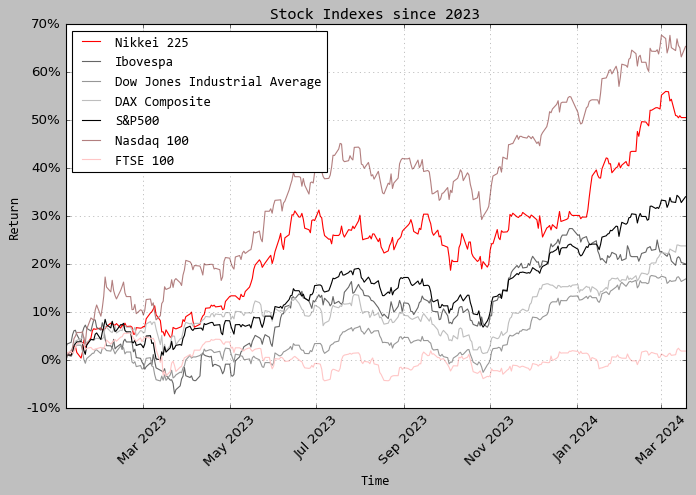

In [8]:
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x*100)
plt.style.use('classic')
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(accum_data['^N225'], color = 'red', label = 'Nikkei 225')
plt.plot(accum_data['^BVSP'], color = '#666666', label = 'Ibovespa')
plt.plot(accum_data['^DJI'], color = '#979797', label = 'Dow Jones Industrial Average')
plt.plot(accum_data['^GDAXI'], color = '#BEBEBE', label = 'DAX Composite')
plt.plot(accum_data['^GSPC'], color = '#000000', label = 'S&P500')
plt.plot(accum_data['^NDX'], color = '#B27F7F', label = 'Nasdaq 100')
plt.plot(accum_data['^FTSE'], color = '#FFC6C6', label = 'FTSE 100')
plt.xticks(rotation= 45)
font = 'Consolas'
plt.rcParams['font.family'] = font
plt.ylabel('Return', fontdict={'family': font})
plt.xlabel('Time', fontdict={'family': font})
plt.title('Stock Indexes since 2023', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)

In [9]:
for i in ativos:
    print(f'{i} performance: {accum_data[i].iloc[-1]:.2%}')
# Source: Yahoo Finance. Nikkei foi superior aos principais índices de ações desde o início de 2023 (perdendo somente pro Nasdaq 100), chegando ao ATH de 34 anos atrás.

^N225 performance: 50.51%
^BVSP performance: 20.04%
^GSPC performance: 34.02%
^GDAXI performance: 23.78%
^NDX performance: 65.34%
^DJI performance: 16.88%
^FTSE performance: 1.87%


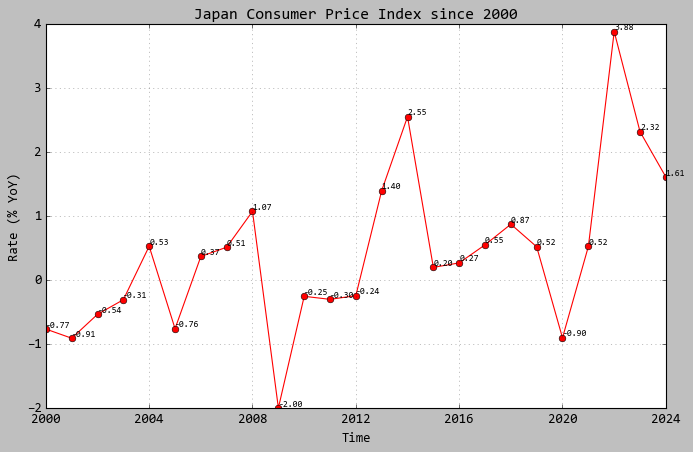

In [11]:
start = datetime(2000,1,1)
cpi_japan = web.DataReader('JPNPCPIPCPPPT', 'fred', start)
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(cpi_japan, color = 'red', label = 'Japan CPI', marker= 'o')
plt.xlabel('Time', fontdict={'family': font})
plt.ylabel('Rate (% YoY)', fontdict={'family': font})
plt.title('Japan Consumer Price Index since 2000', fontdict={'family': font})
for i, value in enumerate(cpi_japan.values):
    plt.text(cpi_japan.index[i], value, f'{value[0]:.2f}', ha= 'left', va= 'bottom', fontsize= 8)
# Source: FMI. Projeções indicam inflação na casa dos 1,5% até 2028 no Japão. Maior nível desde 1970.

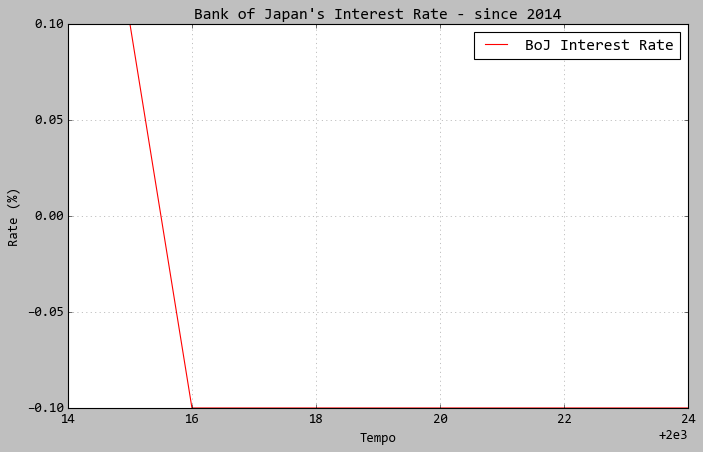

In [12]:
interest_rate = pd.read_excel(r'G:\Meu Drive\Vida\UNICAMP\Data Science\Codigos\Python\Projetos Pessoais\Exercícios Práticos\Finanças\Japan-interest-rate.xlsx')
interest_rate = interest_rate.set_index('Date')
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(interest_rate, color = 'red', label = 'BoJ Interest Rate')
plt.xlabel('Tempo', fontdict={'family': font})
plt.ylabel('Rate (%)', fontdict={'family': font})
plt.title("Bank of Japan's Interest Rate - since 2014", fontdict={'family': font})
plt.legend()
# Source: BoJ. De acordo com a Reuters, o Bank of Japan já considera a saída dos níveis negativos das taxas de juros

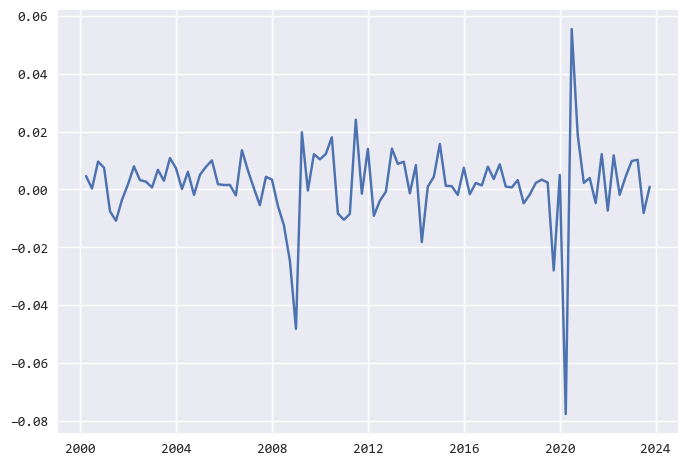

In [7]:
start = datetime(2000,1,1)
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start)
gdp_japan = gdp_japan.pct_change()
plt.plot(gdp_japan)

### Análise
    Diante a situação inflacionária, os altos níveis de poupança no país tendem a diminuir, com os japoneses aproveitando mais as oportunidades de retorno nos equities e demais ativos de risco. Além disso, o mundo vive um período de incerteza hoje, com as principais economias do mundo mantendo altos níveis de taxas de juros. Contudo, o BoJ, como vimos, ainda não se mobilizou sobre os níveis da taxa de juros, que segue em -0.1% desde 2016. De acordo com a Reuters, o BoJ trará as taxas de juros em níveis positivos na semana do dia 17 de março, o que estabelece o "início do fim" da política monetária ultra-flexível do banco central japonês.

<span style="color:yellow">**De acordo com a J.P. Morgan Asset Management, existem três mudanças estruturais que justificam o entusiasmo acerca das ações japonesas.**</span>

1. **Maior crescimento nominal e taxas de juros positivas:** preços mais altos levam a salário mais elevados, que crescem os preços por conta da elevação do consumo, assim criando um ciclo virtuoso. Além disso, as taxas de juros positivas acabam com essa política monetária japonesa ultra-flexível, iniciada em 2016, impulsionando também o setor bancário do país, que possui bastante relevância nos principais índices de ações do país.

2. **Reformas de governança pela Tokyo Stock Exchange:** Atualmente, 35% das empresas japonesas apresentam um *price-to-book ratio* menor que 1x, contra somente 19% na Europa e 1% nos EUA. Isso ocorre principalmente no foco quase inexistente nos acionsitas que essas empresas apresentam - que está mudando. <span style="color:red">Em abril de 2023, a TSE implementou um plano para aumentar o retorno para os acionistas: empresas com *price-to-book* menor que 1x devem criar um plano para aumentar esse valor, ou então enfrentarão, no pior cenário, o fim da listagem na bolsa.</span>*

3. **A situação chinesa:** Diante a desaceleração do crescimento chinês e os riscos que o país apresenta para os investidores (principalmente os investidores de dívida corporativa e ações), fluxos de capital tem saído da China indo em direção a países vizinhos como Índia e Japão, prezando pela diversificação do risco geopolítico chinês.

*De acordo com o site a [TSE](https://www.jpx.co.jp/english/equities/listing/cg/01.html) e com a verificação do Gemini, essa informação em <span style="color:red">vermelho</span> não é verdadeira/não possui checagem de veracidade

## O Efeito Câmbio
Observamos a performance do Nikkei desde 2023, agora observemos a performance do yen:

[*********************100%***********************]  5 of 5 completed


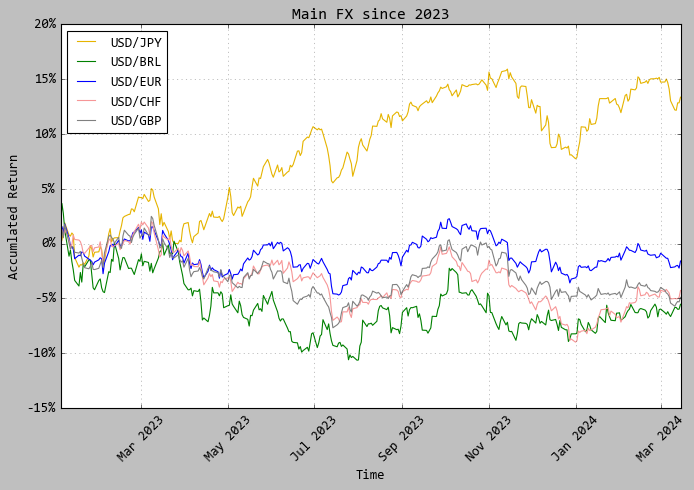

In [16]:
fx = ['JPY=X', 'BRL=X', 'EUR=X', 'CHF=X', 'GBP=X']
start = datetime(2023,1,1)
yen_data = yf.download(fx, start, end)['Adj Close']
daily_fx = yen_data.pct_change().dropna()
accum_fx = (1 + daily_fx).cumprod() - 1
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(accum_fx['JPY=X'], color = '#e6b400', label = 'USD/JPY')
plt.plot(accum_fx['BRL=X'], color = 'green', label = 'USD/BRL')
plt.plot(accum_fx['EUR=X'], color = 'blue', label = 'USD/EUR')
plt.plot(accum_fx['CHF=X'], color = '#f69697', label = 'USD/CHF')
plt.plot(accum_fx['GBP=X'], color = 'gray', label = 'USD/GBP')
plt.xticks(rotation= 45)
plt.xlabel('Time', fontdict={'family': font})
plt.ylabel('Accumlated Return', fontdict={'family': font})
plt.title('Main FX since 2023', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)

In [17]:
for i in fx:
    print(f'{i} performance: {accum_fx[i].iloc[-1]:.2%}')

JPY=X performance: 13.34%
BRL=X performance: -5.54%
EUR=X performance: -1.60%
CHF=X performance: -4.28%
GBP=X performance: -4.91%


- Como podemos ver, desde o início de 2023, o iene japonês, dentre as principais moedas, foi a moeda que mais se desvalorizou frente ao dólar, que ainda teve performance ruim no ano de 2023. Isso demosntra como a moeda tem perdido valor, algo que devemos levar em conta caso desejemos investir em empresas na TSE.

Uma solução para isso é a realização de um **hedge cambial**, que nada mais é do que a proteção contra os efeitos cambiais utilizando, principalmente, contratos futuros de iene. Para nossa sorte, podemos nos expor de forma hedgeada ao mercado japonês pelos ETFs que possuem tal estratégia. É o caso dos ETFs DXJ e DXJ.

In [18]:
start = datetime(2000,1,1)
japan = ['DXJ', 'DXJS', '^N225']
japan_data = yf.download(japan, start, end)['Adj Close']
japan_daily = japan_data.pct_change().dropna()
japan_accum = (1 + japan_daily).cumprod() - 1

[*********************100%***********************]  3 of 3 completed


C:\Users\ferna\AppData\Local\Temp\ipykernel_5620\2077611439.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  japan_daily = japan_data.pct_change().dropna()


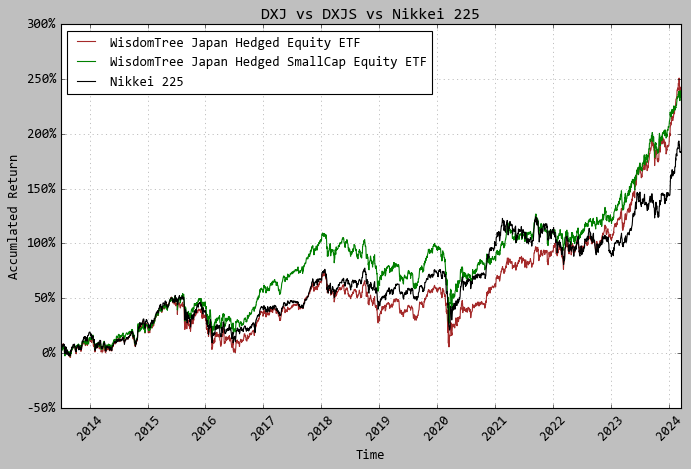

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(japan_accum['DXJ'], color= 'brown', label = 'WisdomTree Japan Hedged Equity ETF')
plt.plot(japan_accum['DXJS'], color = 'green', label = 'WisdomTree Japan Hedged SmallCap Equity ETF')
plt.plot(japan_accum['^N225'], color = 'black', label = 'Nikkei 225')
plt.xticks(rotation= 45)
plt.xlabel('Time', fontdict={'family': font})
plt.ylabel('Accumlated Return', fontdict={'family': font})
plt.title('DXJ vs DXJS vs Nikkei 225', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)

In [20]:
for i in japan:
    print(f'{i} performance: {japan_accum[i].iloc[-1]:.2%}')

DXJ performance: 242.23%
DXJS performance: 239.03%
^N225 performance: 183.01%


In [21]:
for i in japan[:-1]:
    difference = japan_accum[i] - japan_accum['^N225']
    positive_diff_count = (difference>0).sum()
    percentage = (positive_diff_count/len(difference))
    print(f'{i} foi maior que o Nikkei em {percentage:.2%} das vezes.')
dxj_dxjs = japan_accum['DXJS'] - japan_accum['DXJ']
positive_diff_count = (dxj_dxjs>0).sum()
percentage = (positive_diff_count/len(difference))
print(f'DXJS foi maior que o DXJ em {percentage:.2%} das vezes')

DXJ foi maior que o Nikkei em 20.30% das vezes.
DXJS foi maior que o Nikkei em 81.28% das vezes.
DXJS foi maior que o DXJ em 94.72% das vezes


Podemos perceber que o <span style="color:green">**DXJS é melhor que o Nikkei em 81% das vezes e maior que o DXJ em 95% das vezes nos últimos 10 anos (desde sua criação)**</span>. Assim, podemos não só perceber o que o efeito câmbio pode fazer com a performance, mas também que não é suficiente olhar só para a performance final quando olhamos um backtest. É importante observar também como os índices se comportaram ao longo do tempo.
- Nesse caso, tendo comprado um dos três ativos, a probabilidade de venda com lucro é maior no DXJS olhando a performance dos 3 ativos desde 2014, quando iniciou-se a negociação do ETF DXJS na bolsa americana.

**Mas a que custo?**

In [22]:
for i in japan:
    print(f'{i} volatility: {np.std(japan_daily[i]):.2%}')

DXJ volatility: 1.29%
DXJS volatility: 1.28%
^N225 volatility: 1.22%


Por conta da proteção cambial, a performance dos ETFs pode variar em detrimento do resultado obtido no hedge (pensando em relação à perda de ganhos com a valorização da moeda frente ao dólar)

[*********************100%***********************]  3 of 3 completed


C:\Users\ferna\AppData\Local\Temp\ipykernel_5620\1698310360.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  japan_daily = japan_data.pct_change().dropna()


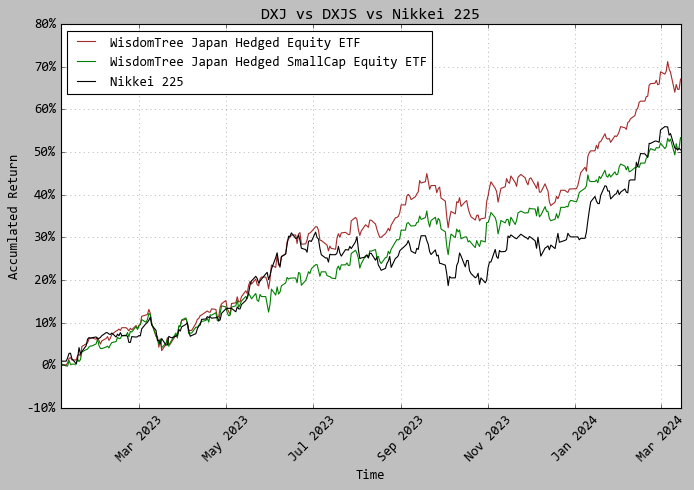

In [23]:
start = datetime(2023,1,1)
japan = ['DXJ', 'DXJS', '^N225']
japan_data = yf.download(japan, start, end)['Adj Close']
japan_daily = japan_data.pct_change().dropna()
japan_accum = (1 + japan_daily).cumprod() - 1
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(japan_accum['DXJ'], color= 'brown', label = 'WisdomTree Japan Hedged Equity ETF')
plt.plot(japan_accum['DXJS'], color = 'green', label = 'WisdomTree Japan Hedged SmallCap Equity ETF')
plt.plot(japan_accum['^N225'], color = 'black', label = 'Nikkei 225')
plt.xticks(rotation= 45)
plt.xlabel('Time', fontdict={'family': font})
plt.ylabel('Accumlated Return', fontdict={'family': font})
plt.title('DXJ vs DXJS vs Nikkei 225', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)